# Bias-variance tradeoff

we consider degree-5 polynomial model (for ground truth) with additive Gaussian noise

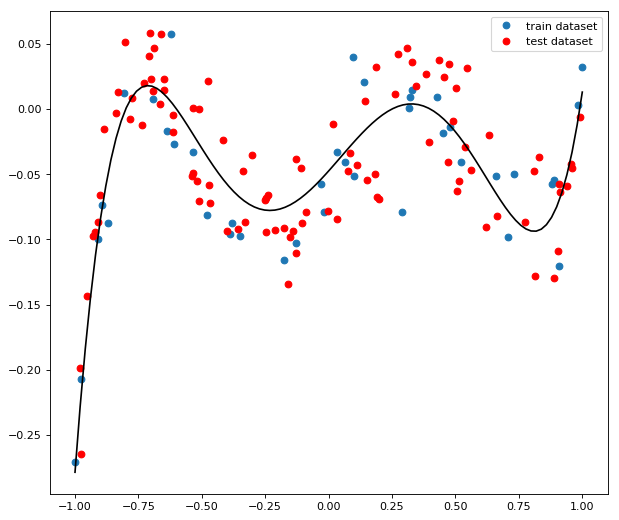

In [4]:
# generate training data
import numpy as np
n = 40 # sample size
x = np.random.uniform(-1,1,n) #sample input data
x = np.sort(x)
x[0]=-1
x[n-1]=1

# ground truth is 5-th order polynomial and we add Gaussian noise to it
y = (x-.99)*(x-.4)*(x-.25)*(x+.6)*(x+.8) + .03*np.random.randn(n)

# generate test data
n_ = 100
x_ = np.random.uniform(-1,1,n_)
y_ = (x_-.99)*(x_-.4)*(x_-.25)*(x_+.6)*(x_+.8) + .03*np.random.randn(n_)


# plot the samples and grounstruth
t = np.linspace(-1,1,100)
y0 = (t-.99)*(t-.4)*(t-.25)*(t+.6)*(t+.8)
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(x,y,'o',label='train dataset')
plt.plot(x_,y_,'ro',label='test dataset')
plt.plot(t,y0,'k-')
plt.legend()
plt.show()

run=0
yhat_simple = np.zeros((100,np.size(t)))
yhat_complex = np.zeros((100,np.size(t)))
MSEtrain = np.zeros(100)
MSEtest = np.zeros(100)
MSEtrue = np.zeros(100)
MSEtrain1 = np.zeros(100)
MSEtest1 = np.zeros(100)
MSEtrue1 = np.zeros(100)

In typical scenarios, we only have one set of samples, which we separate into $S_{\rm test}$ and $S_{\rm train}$

- it is critical that those two sets do not overlap and the sets are chosen randomly to ensure that the test error is independent of the training error, and also the test samples are coming frmo the same distribution as the new samples that will come in the future

However, in order to understand how the test error behaves (theoretically), we consider the expected test error, and call it true error: i.e. ${\cal L}_{\rm true} = {\mathbb E}[{\cal L}_{\rm test}]$ 

- test error is an **unbiased** estimate of the true error
- true error is unobservable (we canot copmute it, given finite samples)
- but we care the most about the true error
- so we use test error as a surrogate or an approximation

In order to compute the true error, we simulate a process where we get many fresh samples, and train new predictor each time with the fresh set of samples. It is important to understand that the resulting predictor $f_{S_{\rm train}}(\cdot)$ is a random function, where the randomness coems from the fresh random training data set $S_{\rm train}$. We will draw many such random functions, and plot them AND see how test, train, true errors behave.


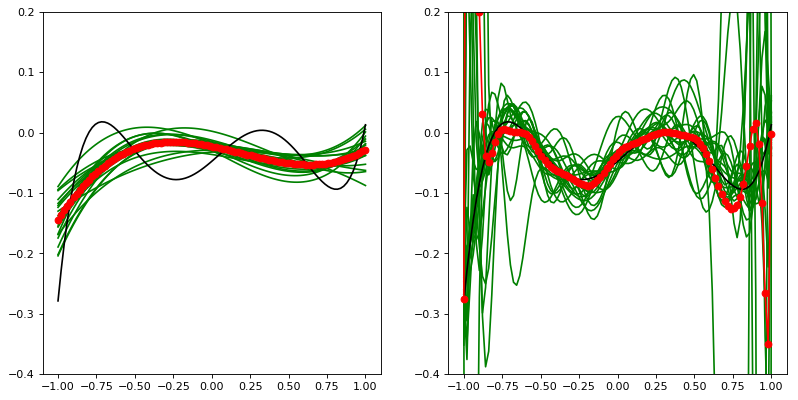

current train error = 0.0036791644380554187 			0.0005421686349568773
current test error  = 0.0037962529988410953 			0.14210029429557927
average test error  = 0.003848325503758571 			0.9566840871538074


In [29]:
n = 40 # sample size
x = np.random.uniform(-1,1,n) #sample input data
x[0]=-1
x[n-1]=1
y = (x-.99)*(x-.4)*(x-.25)*(x+.6)*(x+.8) + .03*np.random.randn(n)


# degree-2 polynomial linear regression
p=2
X = np.vstack([np.ones(len(x)),x,x**2,x**3]).T
w = np.array(p+1)
w = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),y)
T_ = np.vstack([np.ones(len(t)),t,t**2,t**3]).T
yhat_simple[int(run)] = np.matmul(T_,w)
yh = np.matmul(X,w)
X_ = np.vstack([np.ones(len(x_)),x_,x_**2,x_**3]).T
y_h= np.matmul(X_,w)

# degree-20 polynomial linear regression
p=20
X = np.vstack([np.ones(len(x)),x,x**2,x**3,x**4,x**5,x**6,x**7,x**8,x**9,x**10,x**11,x**12,x**13,x**14,x**15,x**16,x**17,x**18,x**19,x**20]).T
w = np.array(p+1)
w = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),y)
T_ = np.vstack([np.ones(len(t)),t,t**2,t**3,t**4,t**5,t**6,t**7,t**8,t**9,t**10,t**11,t**12,t**13,t**14,t**15,t**16,t**17,t**18,t**19,t**20]).T
yhat_complex[int(run)] = np.matmul(T_,w)
yh1 = np.matmul(X,w)
X_ = np.vstack([np.ones(len(x_)),x_,x_**2,x_**3,x_**4,x_**5,x_**6,x_**7,x_**8,x_**9,x_**10,x_**11,x_**12,x_**13,x_**14,x_**15,x_**16,x_**17,x_**18,x_**19,x_**20]).T
y_h1= np.matmul(X_,w)

# figure left
ave_simple = np.zeros(np.size(t))
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
for irun in np.linspace(0,run,run+1):
    plt.plot(t,yhat_simple[int(irun)],'g-')
    ave_simple = ave_simple + yhat_simple[int(irun)]
plt.plot(t,y0,'k-')
plt.plot(t,(1/float(run+1))*ave_simple,'r-o')
axes = plt.gca()
axes.set_ylim([-0.4,0.2])
#plt.show()

MSEtrain[run] = (1/float(n))*np.sum((y - yh)**2)
MSEtest[run]  = (1/float(n_))*np.sum((y_ - y_h)**2)
MSEtrue[run]  = 0
for irun in np.linspace(0,run,run+1): 
    MSEtrue[run] = MSEtrue[run] + MSEtest[int(irun)]
MSEtrue[run] = (1/float(run+1))*MSEtrue[run]

# figure right
plt.subplot(1,2,2)
ave_complex = np.zeros(np.size(t))
for irun in np.linspace(0,run,run+1):
    plt.plot(t,yhat_complex[int(irun)],'g-')
    ave_complex = ave_complex + yhat_complex[int(irun)]
plt.plot(t,y0,'k-')
plt.plot(t,(1/float(run+1))*ave_complex,'r-o')
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
axes.set_ylim([-0.4,0.2])
plt.show()

MSEtrain1[run] = (1/float(n))*np.sum((y - yh1)**2)
MSEtest1[run]  = (1/float(n_))*np.sum((y_ - y_h1)**2)
MSEtrue1[run]  = 0
for irun in np.linspace(0,run,run+1): 
    MSEtrue1[run] = MSEtrue1[run] + MSEtest1[int(irun)]
MSEtrue1[run] = (1/float(run+1))*MSEtrue1[run]

print 'current train error =', MSEtrain[run], '\t\t\t', MSEtrain1[run]
print 'current test error  =', MSEtest[run], '\t\t\t', MSEtest1[run]
print 'average test error  =', MSEtrue[run], '\t\t\t', MSEtrue1[run]


run=run+1